In [165]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset
data_path = '/Users/willberritt/Downloads/emails.csv'
emails_df = pd.read_csv(data_path)

In [166]:
# Sample one-tenth of the dataset randomly to make it smaller and easier to run
emails_df_sampled = emails_df

In [167]:
# List of main culprits in the Enron scandal
main_culprits = [
    'kenneth.lay@enron.com', 'jeff.skilling@enron.com', 'andrew.fastow@enron.com',
    'richard.causey@enron.com', 'ken.rice@enron.com', 'cliff.baxter@enron.com'
]

In [168]:
# Function to parse the email message
def parse_email(message):
    headers = {}
    lines = message.split('\n')
    for line in lines:
        if ': ' in line:
            key, value = line.split(': ', 1)
            headers[key] = value
        else:
            break
    return headers

In [169]:
# Apply the parsing function to the 'message' column
parsed_emails = emails_df_sampled['message'].apply(parse_email)
parsed_emails_df = pd.json_normalize(parsed_emails)

In [170]:
parsed_emails_df = parsed_emails_df[['From', 'To', 'Subject', 'Date']]

In [171]:
# Combine the parsed data with the sampled dataframe
emails_df_sampled = parsed_emails_df

In [172]:
# Extract sender and recipients, and split recipients into individual email addresses
emails_df_sampled['To'] = emails_df_sampled['To'].str.split(',')
emails_exploded = emails_df_sampled.explode('To')

In [173]:
# Clean up the email addresses and handle NaN values
emails_exploded['From'] = emails_exploded['From'].str.strip()
emails_exploded['To'] = emails_exploded['To'].astype(str).str.strip()

In [196]:
# Remove null emails
emails_exploded = emails_exploded.dropna(subset=['From', 'To'])

In [197]:
# Remove null subjects
emails_exploded = emails_exploded.dropna(subset=['Subject'])

In [198]:
# Fuilter for culprits only
culprits_emails = emails_exploded[
    (emails_exploded['From'].isin(main_culprits)) |
    (emails_exploded['To'].isin(main_culprits))
]

In [201]:
# Define the path to save the CSV file
output_path = '/Users/willberritt/Downloads/enron_emails_clean.csv'
culprits_emails.to_csv(output_path, index=False)

In [199]:
# Create a graph from the filtered sender and recipients
G_culprits = nx.from_pandas_edgelist(culprits_emails, 'From', 'To', create_using=nx.DiGraph())

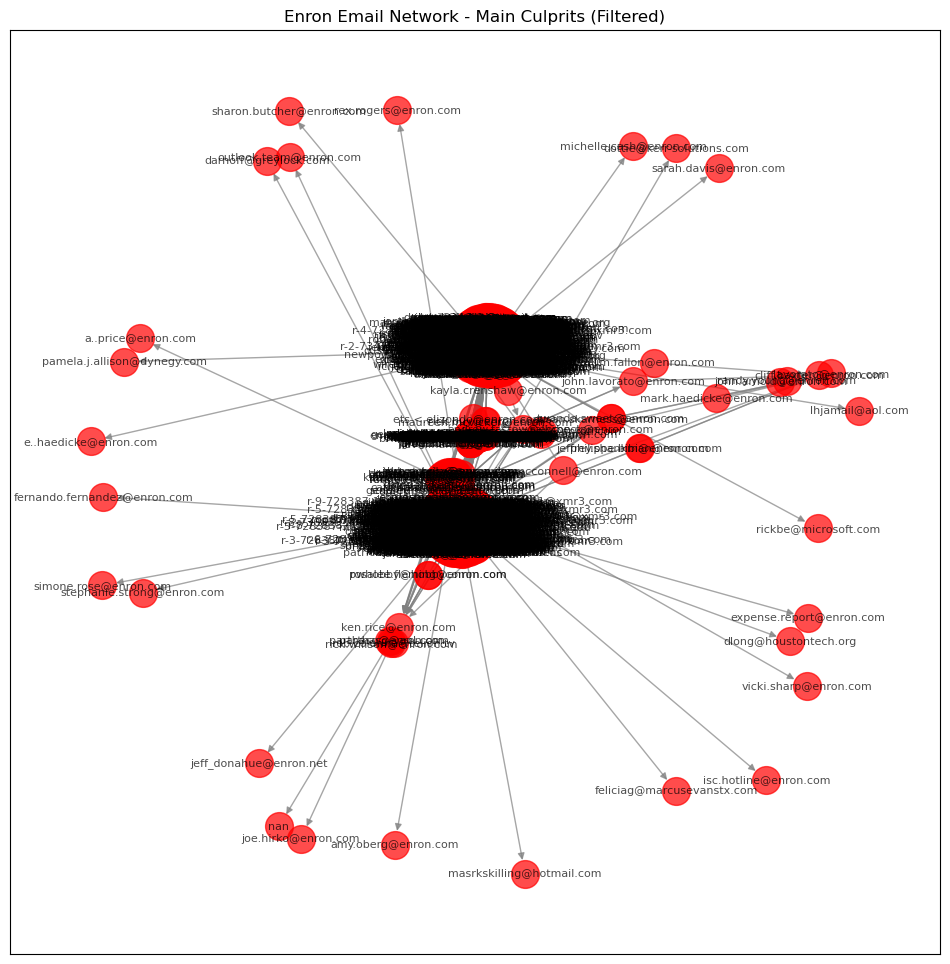

In [200]:
# Plot the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_culprits, seed=42)
nx.draw_networkx(G_culprits, pos, with_labels=True, font_size=8, node_size=400, node_color='red', edge_color='gray', alpha=0.7)
plt.title("Enron Email Network - Main Culprits (Filtered)")
plt.show()

In [203]:
print(culprits_emails)

                           From                       To  \
3171      john.arnold@enron.com   cliff.baxter@enron.com   
4246      john.arnold@enron.com   cliff.baxter@enron.com   
6071      john.arnold@enron.com   cliff.baxter@enron.com   
7222      john.arnold@enron.com   cliff.baxter@enron.com   
8338        iris.mack@enron.com    kenneth.lay@enron.com   
...                         ...                      ...   
503199     greg.piper@enron.com    kenneth.lay@enron.com   
503306  kevin.garland@enron.com       ken.rice@enron.com   
503475     liz.taylor@enron.com  jeff.skilling@enron.com   
515955     greg.piper@enron.com    kenneth.lay@enron.com   
515989     greg.piper@enron.com    kenneth.lay@enron.com   

                                                  Subject  \
3171                                                        
4246                                                        
6071                                                        
7222                               